In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# Neural Network implementation with Matrices #2: A Hard-coded Algorithm

Here, we will use the matrix approach from the last class to implement an algorithm that trains a neural network with 3 layers, where the input layers has 2 neurons, hidden layer 3 neurons and the output layer 2 neurons.

The following functions are mostly used for plotting and evaluating the number of correctly classified data points.

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def convert_label(label):
    if (label == -1):
        return (1,0)
    if (label == 1):
        return (0,1)
    
def plot_data(data, labels):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    nudge = 0.08
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    ax.set_aspect('equal', 'datalim')
    plt.show()
    
def create_meshgrid(data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return (xx,yy,np.ones(xx.shape))

def eval_accuracy_neural(params, data, labels):
    w_2, b_2, w_3, b_3 = params
    num_correct = 0;
    
    for (X,Y),label_old in zip(data,labels):
        a_1 = np.array([X, Y]).reshape(1,2).T
        a_2 = sigmoid(w_2.dot(a_1) + b_2)
        a_3 = sigmoid(w_3.dot(a_2) + b_3)
        sc = np.array((int(a_3[0]>0.5),int(a_3[1]>0.5)))
        true_label = convert_label(label_old)
        if (sc[0]==true_label[0] and sc[1]==true_label[1]):
            num_correct += 1
    return round(num_correct / len(data), 4)

def plot_neural_simple(params, grid, data, labels, iteration, accuracy):
    nudge = 0.06
    w_2, b_2, w_3, b_3 = params
    xx,yy,Z = grid
    
    for i in range(xx.shape[0]): # row
        for j in range(yy.shape[1]): #column
            a_1 = np.array([xx[i][j], yy[i][j]]).reshape(1,2).T
            a_2 = sigmoid(w_2.dot(a_1) + b_2)
            a_3 = sigmoid(w_3.dot(a_2) + b_3)
            score = 0
            if (np.argmax(a_3)==0):
                score =  -1
            else:
                score =  1
            Z[i][j] = score
            
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.title(f'accuracy at the iteration {iteration}: {accuracy}')
    ax.contourf(xx, yy, Z, cmap=plt.cm.binary, alpha=0.1, zorder=15)
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    ax.set_aspect('equal')
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

In [3]:
data = np.array([[ 1.2, 0.7],
                 [-0.3,-0.5],
                 [ 3.0, 0.1],
                 [-0.1,-1.0],
                 [-0.0, 1.1],
                 [ 2.1,-1.3],
                 [ 3.1,-1.8],
                 [ 1.1,-0.1],
                 [ 1.5,-2.2],
                 [ 4.0,-1.0]])

In [4]:
labels = np.array([  1,
                    -1,
                     1,
                    -1,
                    -1,
                     1,
                    -1,
                     1,
                    -1,
                    -1])

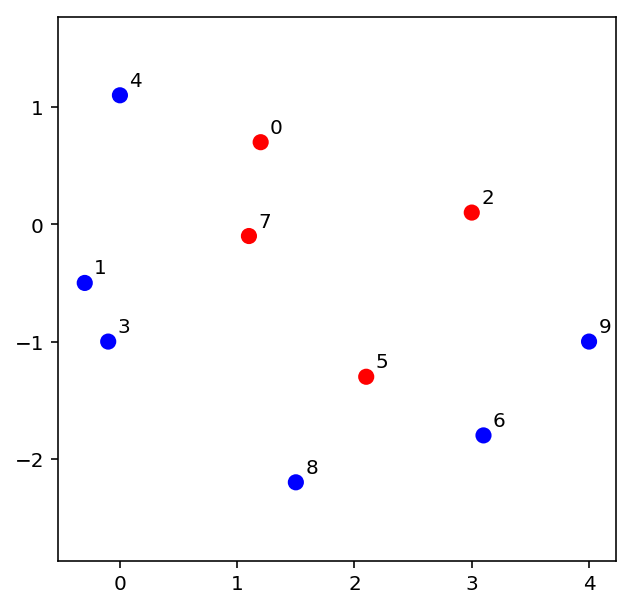

In [5]:
plot_data(data, labels)

In [6]:
def train_neural_network(data, labels, step_size, no_epochs, iter_info):
    grid = create_meshgrid(data)
    data_len = data.shape[0]
    # weights and biases of the layer 2
    w_2 = np.random.randn(3,2)
    b_2 = np.random.randn(3,1)
    # weights and biases of the layer 3
    w_3 = np.random.randn(2,3)
    b_3 = np.random.randn(2,1)

    for epoch in range(no_epochs):
        total_cost = 0 # total cost for all training examples
        # here we store the averaged partial derivatives
        ddw_2 = np.zeros(w_2.shape)
        ddw_3 = np.zeros(w_3.shape)
        ddb_2 = np.zeros(b_2.shape)
        ddb_3 = np.zeros(b_3.shape)

        for dp, label in zip(data, labels):
            
            a_1 = dp.reshape(1,2).T # data point vector
            y = np.array(convert_label(label)).reshape(2,1) # data point's label

            # forward pass
            # activations of the layer 2
            a_2 = sigmoid(w_2.dot(a_1) + b_2)
            # activations of the layer 3
            a_3 = sigmoid(w_3.dot(a_2) + b_3)

            # computing the cost of a single example
            C_x = 0.5*sum((y - a_3)**2)[0]
            # adding the cost of the single example to the total cost
            total_cost += C_x

            # backward pass
            delta_3 = (a_3 - y) * a_3 * (1 - a_3)
            delta_2 = w_3.T.dot(delta_3) * a_2 * (1 - a_2)
            db_3 = delta_3
            db_2 = delta_2
            dw_3 = delta_3.dot(a_2.T)
            dw_2 = delta_2.dot(a_1.T)

            # adding together the derivatives for each data to compute an average
            ddw_2 += dw_2
            ddw_3 += dw_3
            ddb_2 += db_2
            ddb_3 += db_3

        # updating the weights and biases of the 3rd (output) layer
        w_3 -= (ddw_3*step_size)
        b_3 -= (ddb_3*step_size)
        # updating the weights and biases of the 2nd (hidden) layer
        w_2 -= (ddw_2*step_size)
        b_2 -= (ddb_2*step_size)

        if (epoch%iter_info==0):
            params = (w_2, b_2, w_3, b_3)
            accuracy = eval_accuracy_neural(params, data, labels)
            plot_neural_simple(params, grid, data, labels, epoch, accuracy)
            print (f'total cost: {round(total_cost,4)}')

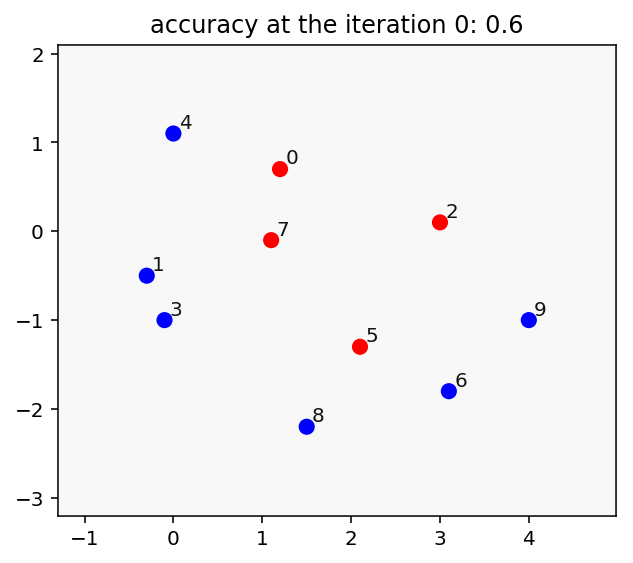

total cost: 3.1271


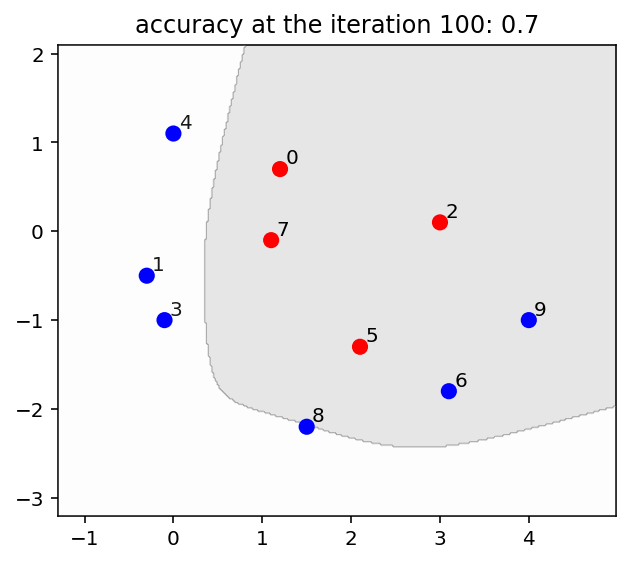

total cost: 0.8356


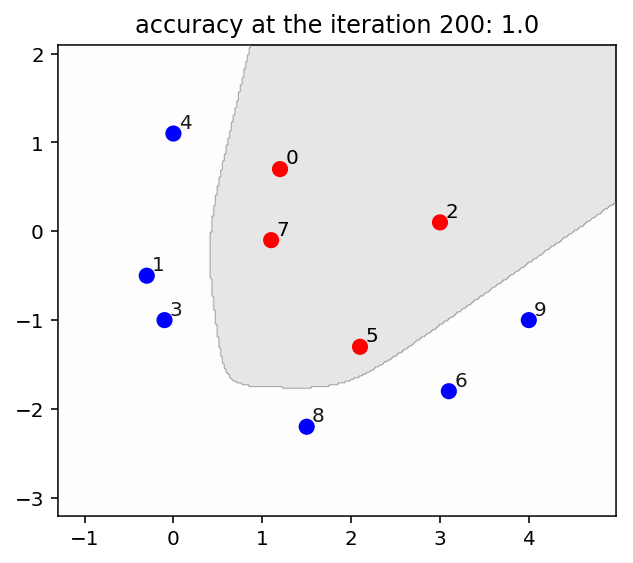

total cost: 0.1012


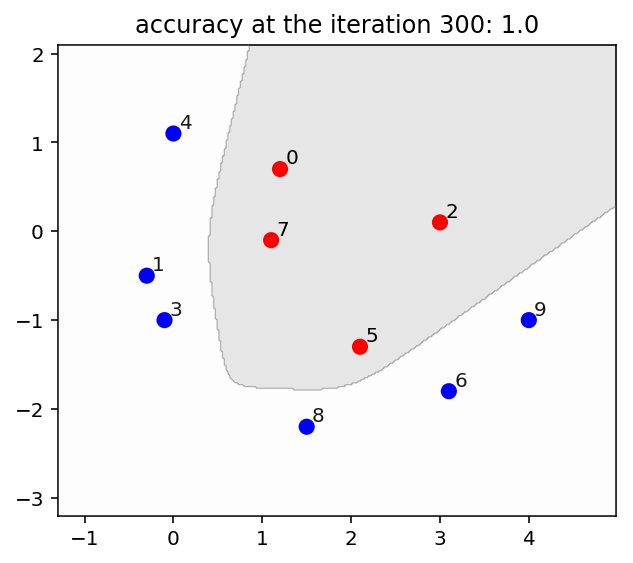

total cost: 0.0426


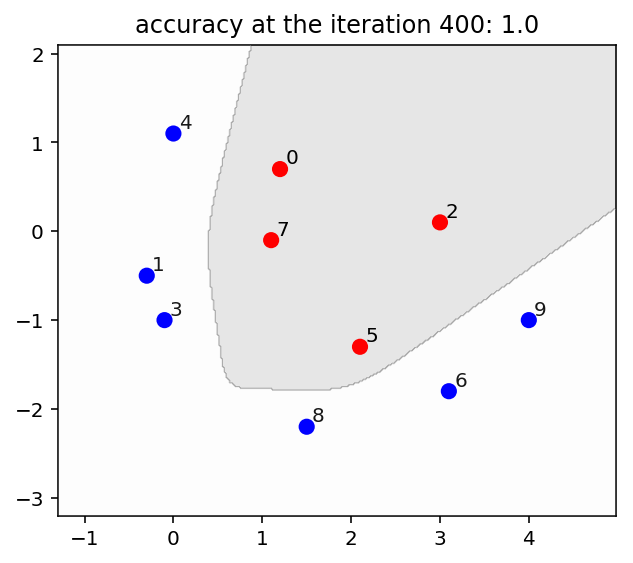

total cost: 0.027


In [7]:
train_neural_network(data, labels, 1, 401, 100)